In [ ]:
import os

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"  # Arrange GPU devices starting from 0
os.environ["CUDA_VISIBLE_DEVICES"]= "2,3"  # Set the GPU 2 to use

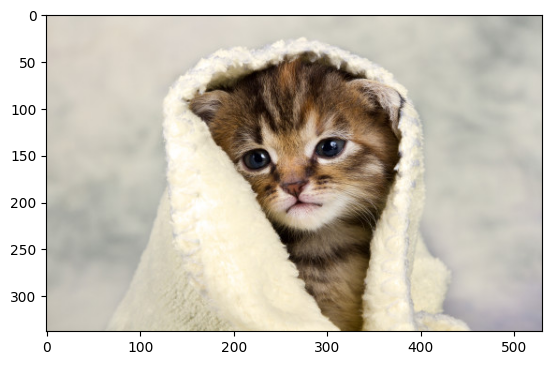

('n02124075', 'Egyptian_cat', 0.18875825)
('n02441942', 'weasel', 0.14167897)
('n02123045', 'tabby', 0.11168624)
('n02808304', 'bath_towel', 0.11121221)
('n02127052', 'lynx', 0.107641205)


In [ ]:
import numpy as np
from PIL import Image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# VGG16 모델 로드. 처음 실행 시에는 가중치(weight)를 다운로드 받아야 합니다.
model = VGG16(weights='imagenet')

# 분류하고자 하는 이미지 로드 및 전처리
image_path = 'cat.jpg'  # 여기에 원하는 이미지 경로를 넣어주세요.
original = load_img(image_path)  # 원본 이미지 로드 (시각화 용)
image = load_img(image_path, target_size=(224, 224))  # VGG16은 입력으로 (224, 224) 크기의 이미지를 기대합니다.
image = img_to_array(image)
image = image.reshape((1,) + image.shape)  # 첫 번째 차원 추가 (모델이 배치 형태의 입력을 기대하기 때문)
image = preprocess_input(image)

# 예측 수행 및 결과 해석
predictions = model.predict(image)
labels = decode_predictions(predictions)

# 원본 이미지 출력
plt.imshow(original)
plt.show()

# 예측 결과 출력
for label in labels[0]:
    print(label)


In [1]:
import torch
import torchvision
print(torch.__version__)
print(torchvision.__version__)


2.0.1+cu118
0.15.2+cu118


In [46]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image, ImageDraw
import IPython.display as display

# 모델 불러오기 (이전에 모델을 다운로드 및 설정해야 합니다.)
model = fasterrcnn_resnet50_fpn(pretrained=True)
print(model.eval())

# 입력 이미지 로드
image_path = "cat.jpg"  # 탐지할 이미지 경로 설정
image = Image.open(image_path).convert("RGB")

# 이미지를 텐서로 변환
image_tensor = F.to_tensor(image).unsqueeze(0)

# 추론 수행하여 바운딩 박스와 예측 클래스 얻기
with torch.no_grad():
    predictions = model(image_tensor)

boxes = predictions[0]['boxes'].cpu().numpy()
labels = predictions[0]['labels'].cpu().numpy()

# 바운딩 박스 크기를 조정하는 예제 코드
scaling_factor = 7.0  # 크기를 0.7배로 줄임
new_boxes = []

for box, label in zip(boxes, labels):
    # 좌표를 정수로 변환
    box = box.astype(int)

    # 좌표가 이미지 경계를 벗어나지 않도록 조정
    box[0] = max(0, box[0])
    box[1] = max(0, box[1])

    # 바운딩 박스 크기 조정
    new_width = int(box[2] * scaling_factor)
    new_height = int(box[3] * scaling_factor)
    box[2] = new_width
    box[3] = new_height

    new_boxes.append(box.tolist())

# 결과 출력 (바운딩 박스 그리기)
draw = ImageDraw.Draw(image)
font = ImageFont.load_default()

for box, label in zip(new_boxes, labels):
    text_x = box[0]
    text_y = box[1] - 10
    draw.rectangle(box, outline='red')
    draw.text((text_x, text_y), f'{class_labels[label]}', fill='green', font=font)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

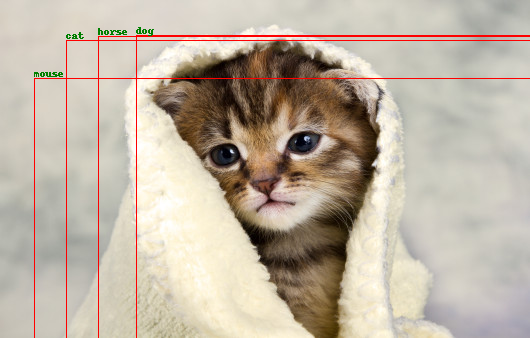

In [47]:
# 이미지를 화면에 표시
display.display(image)